In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"sales_data.csv")
df

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680
...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Date         100 non-null    str  
 1   Product      100 non-null    str  
 2   Quantity     100 non-null    int64
 3   Price        100 non-null    int64
 4   Customer_ID  100 non-null    str  
 5   Region       100 non-null    str  
 6   Total_Sales  100 non-null    int64
dtypes: int64(3), str(4)
memory usage: 5.6 KB


In [4]:
df.isnull().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

In [5]:
df.describe()

,Quantity,Price,Total_Sales
count,100.000000,100.000000,100.000000
mean,4.780000,25808.510000,123650.480000
std,2.588163,13917.630242,100161.085275
min,1.000000,1308.000000,6540.000000
25%,2.750000,14965.250000,39517.500000
50%,5.000000,24192.000000,97955.500000
75%,7.000000,38682.250000,175792.500000
max,9.000000,49930.000000,373932.000000


<Axes: >

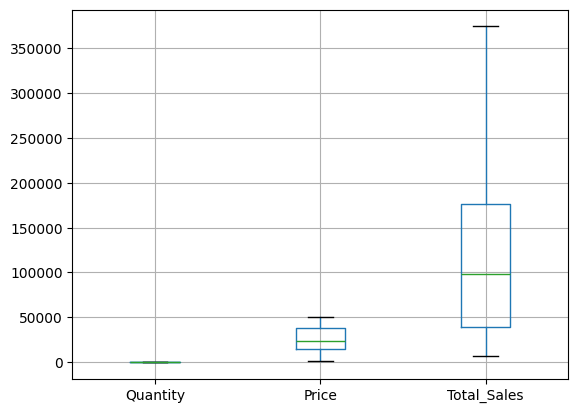

In [6]:
df.boxplot()

In [20]:
print(df["Total_Sales"].sum())

12365048


In [8]:
df[["Year", "Month", "Day"]] = df["Date"].str.split("-", expand=True)
df

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Year,Month,Day
0,2024-01-01,Phone,7,37300,CUST001,East,261100,2024,01,01
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2024,01,02
2,2024-01-03,Phone,2,21746,CUST003,West,43492,2024,01,03
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,2024,01,04
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,2024,01,05
...,...,...,...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160,2024,04,05
96,2024-04-06,Headphones,1,7647,CUST097,West,7647,2024,04,06
97,2024-04-07,Tablet,5,27196,CUST098,East,135980,2024,04,07
98,2024-04-08,Monitor,1,30717,CUST099,North,30717,2024,04,08


In [ ]:
df.drop(['Date'], axis=1, inplace=True)
df 

,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Year,Month,Day
0,Phone,7,37300,CUST001,East,261100,2024,01,01
1,Headphones,4,15406,CUST002,North,61624,2024,01,02
2,Phone,2,21746,CUST003,West,43492,2024,01,03
3,Headphones,1,30895,CUST004,East,30895,2024,01,04
4,Laptop,8,39835,CUST005,North,318680,2024,01,05
...,...,...,...,...,...,...,...,...,...
95,Tablet,8,20770,CUST096,North,166160,2024,04,05
96,Headphones,1,7647,CUST097,West,7647,2024,04,06
97,Tablet,5,27196,CUST098,East,135980,2024,04,07
98,Monitor,1,30717,CUST099,North,30717,2024,04,08


In [10]:
monthly_revenue_df = df.groupby('Month').agg(
    monthly_sales=('Total_Sales', 'sum'),
    monthly_customers = ('Customer_ID', 'nunique')    
)
monthly_revenue_df

,monthly_sales,monthly_customers
Month,,
01,4120524,31
02,2656050,29
03,4485006,31
04,1103468,9


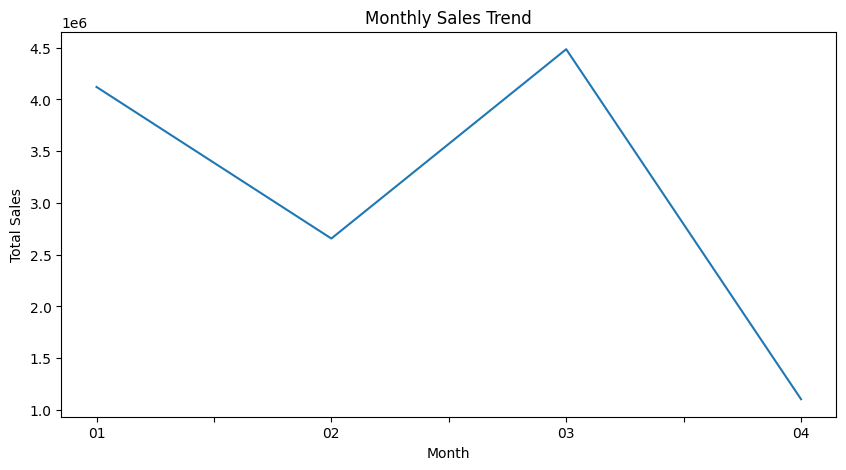

In [18]:
monthly_revenue_df["monthly_sales"].plot(kind='line', 
                                         figsize=(10,5),
                                         xlabel='Month', 
                                         ylabel='Total Sales', 
                                         title='Monthly Sales Trend')
plt.show()

In [11]:
product_performance_df = df.groupby('Product').agg(
    total_sale = ('Total_Sales', 'sum'),
    quantity_sold = ('Quantity', 'sum'),
    count_customers = ('Customer_ID', 'nunique')
)
product_performance_df.sort_values(by='total_sale', ascending=False, inplace=True)
product_performance_df

,total_sale,quantity_sold,count_customers
Product,,,
Laptop,3889210,136,24
Tablet,2884340,127,26
Phone,2859394,101,20
Headphones,1384033,48,15
Monitor,1348071,66,15


In [ ]:
region_wise_df = df.groupby('Region').agg(
    total_sale = ('Total_Sales', 'sum'),
    quantity_sold = ('Quantity', 'sum'),
    count_customers = ('Customer_ID', 'nunique')
)
region_wise_df.sort_values(by='total_sale', ascending=False, inplace=True)
region_wise_df

,total_sale,quantity_sold,count_customers
Region,,,
North,3983635,147,28
South,3737852,143,27
East,2519639,94,19
West,2123922,94,26
